In [23]:
import numpy as np
from itertools import product
from scipy.stats import entropy
import matplotlib.pyplot as plt

In [6]:
# loading Database
with open('/content/sample_data/Different_PFMs_Matrix_based', 'r') as file:
    lines = file.readlines()

In [7]:
PFMs = []
i = 1

while i <= 46:
  selected_lines = lines[i:i+4]
  matrix = np.loadtxt(selected_lines)
  PFMs.append(matrix)
  i += 5

In [9]:
# making PPM from the PFM
PPMs = []
for pfm in PFMs:

  total_sequences = np.sum(pfm[:, 0])
  PPM = pfm / total_sequences
  PPMs.append(PPM)

In [13]:
def generate_sequences(ppm_matrix, sequence_length, num_sequences):
  num_positions = ppm_matrix.shape[1]
  sequences = []

  for _ in range(num_sequences):
      sequence = []
      for i in range(sequence_length):
          col_sum = np.sum(ppm_matrix[:, i])

          rand_val = np.random.uniform(0, col_sum)

          col_idx = 0
          cumulative_sum = ppm_matrix[col_idx, i]
          while cumulative_sum < rand_val:
              col_idx += 1
              cumulative_sum += ppm_matrix[col_idx, i]

          nucleotides = ['A', 'C', 'G', 'T']
          nucleotide = nucleotides[col_idx]
          sequence.append(nucleotide)

      sequences.append(sequence)

  return sequences

In [15]:
# generating a random sequence based on PPM
s = []
for ppm in PPMs:
  sequences = generate_sequences(ppm, 10, 30)
  s.append(sequences)

In [17]:
def create_PFM(sequences):
  num_columns = len(sequences[0])

  pfm = np.zeros((4, num_columns))

  for s in sequences:
    for i, nucleotide in enumerate(s):
      if nucleotide == 'A':
        pfm[0, i] += 1
      elif nucleotide == 'C':
        pfm[1, i] += 1
      elif nucleotide == 'G':
        pfm[2, i] += 1
      elif nucleotide == 'T':
        pfm[3, i] += 1
  return pfm

In [18]:
sample_PFMs = []
for sequences in s:
  sample_pfm = create_PFM(sequences)
  sample_PFMs.append(sample_pfm)

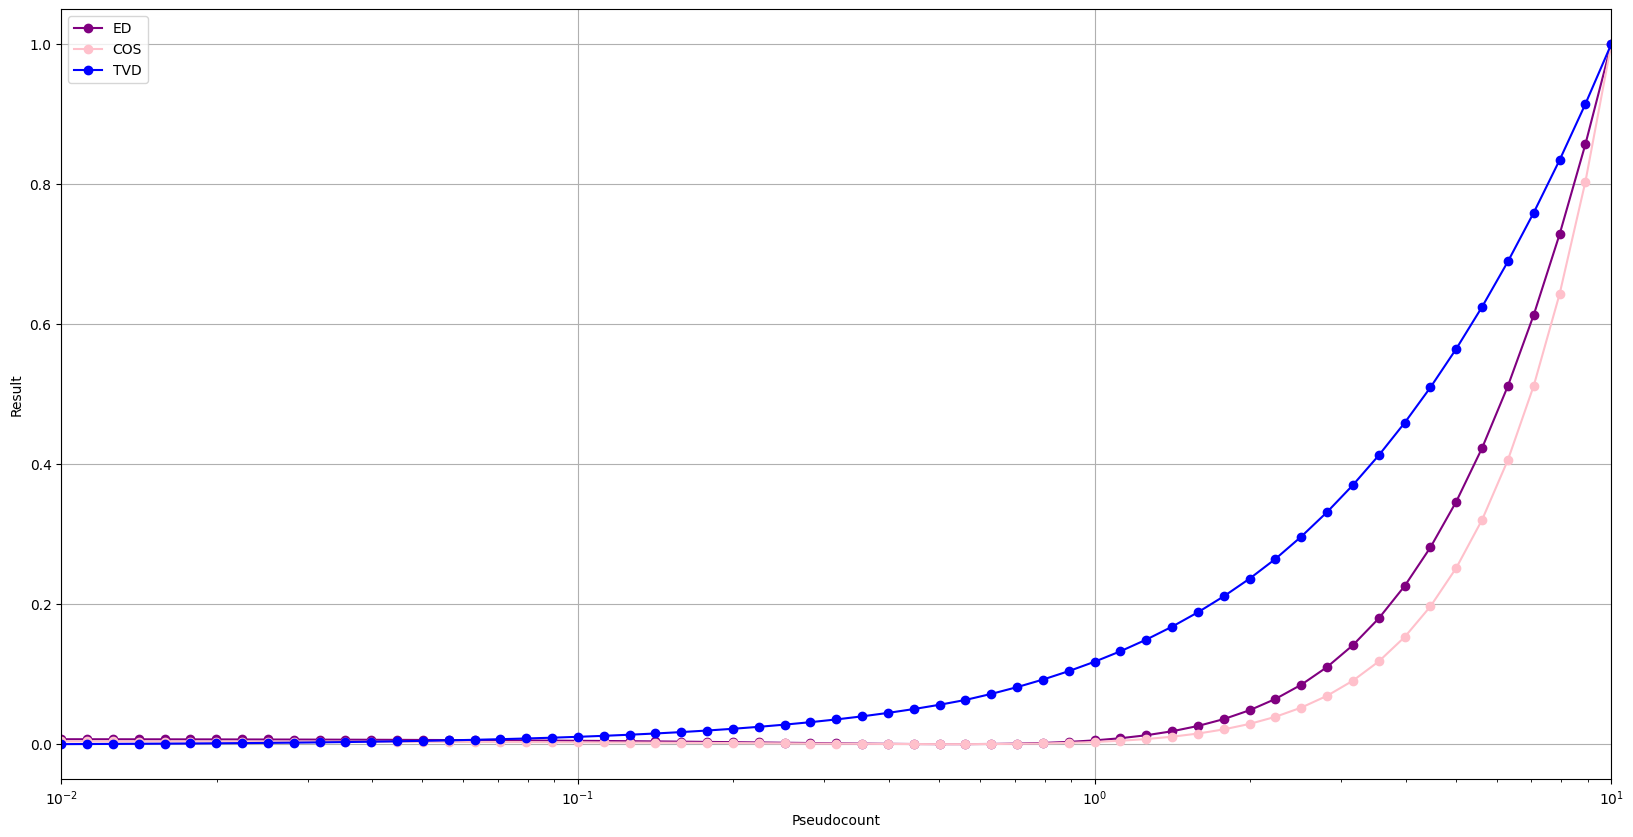

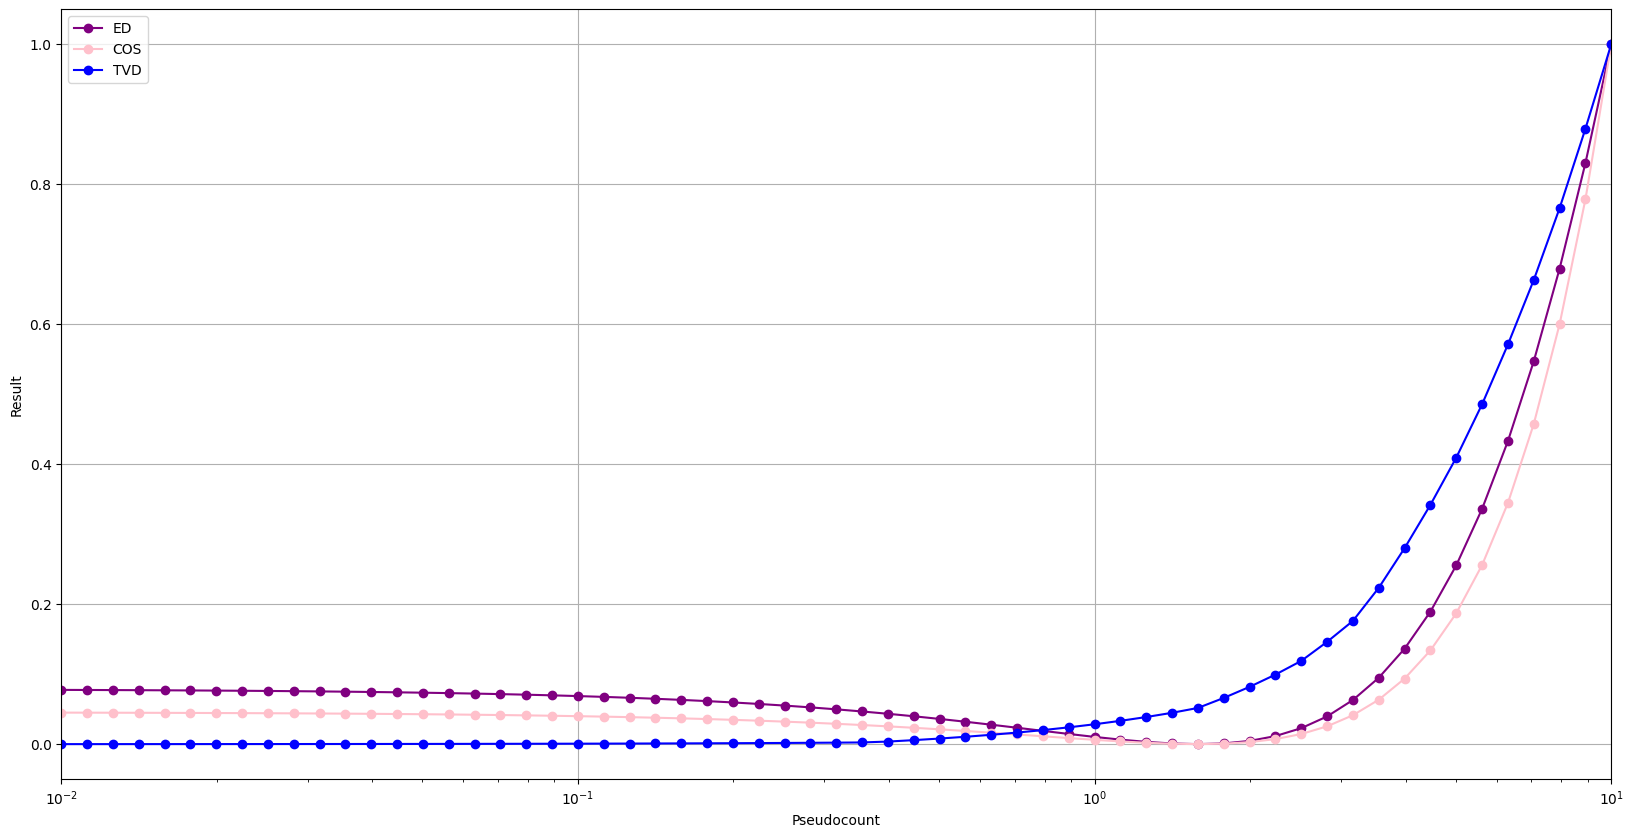

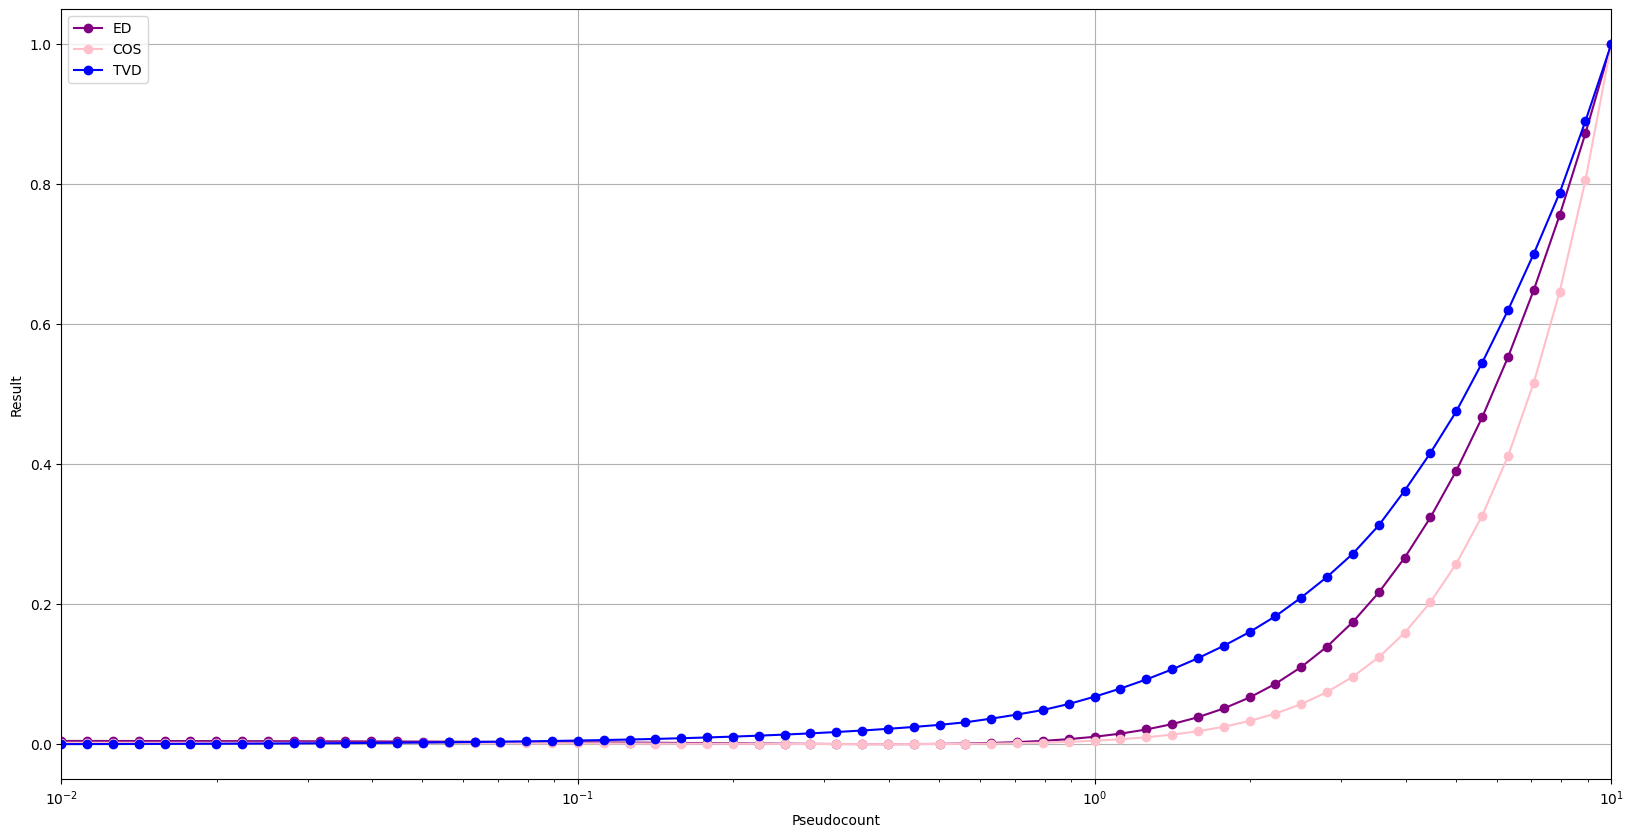

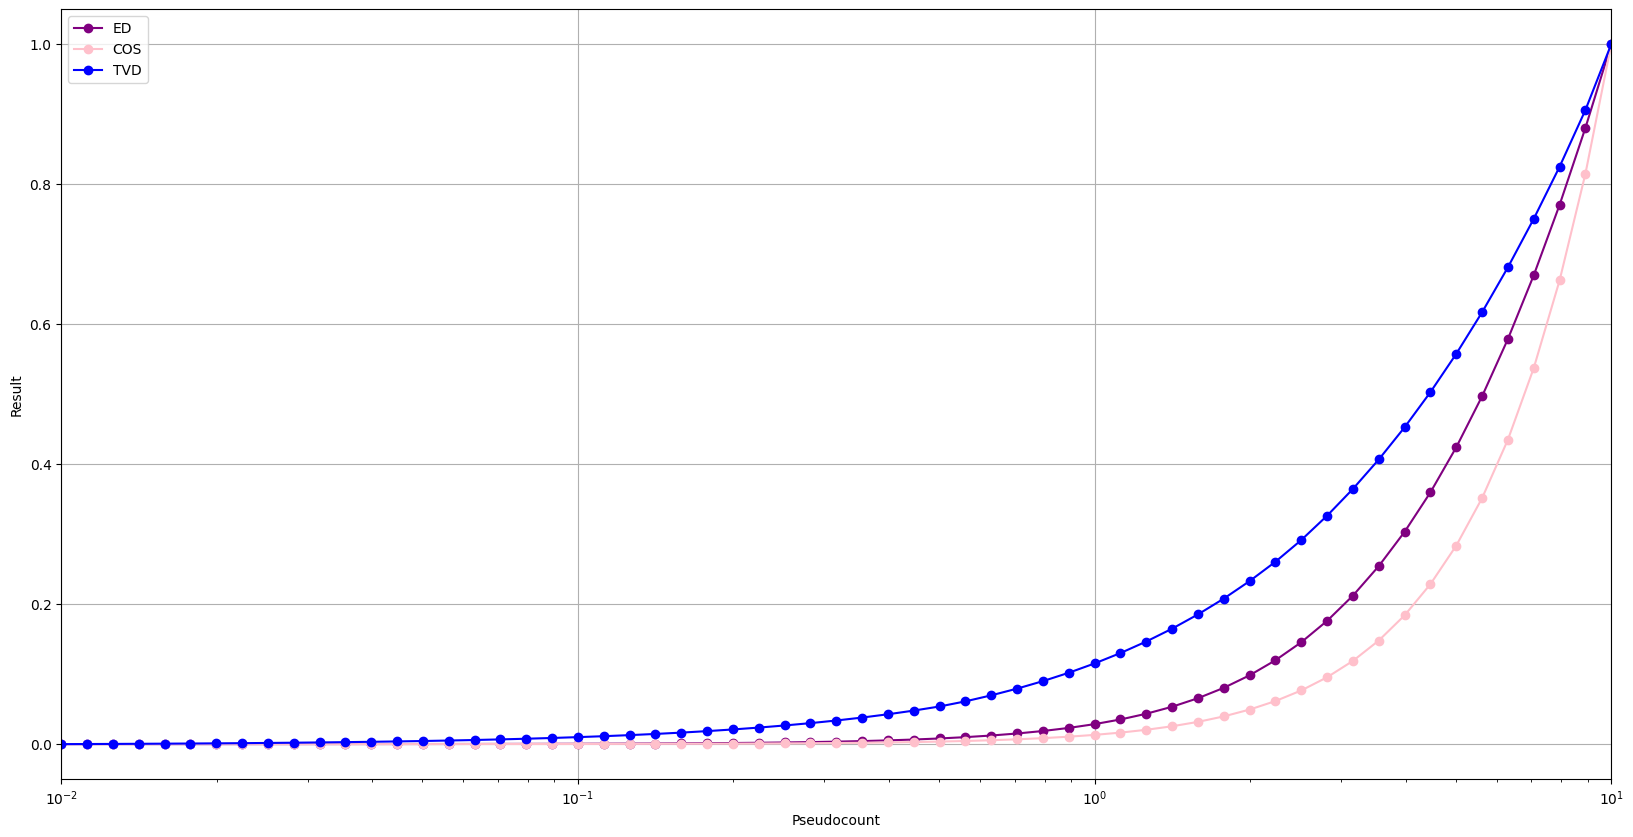

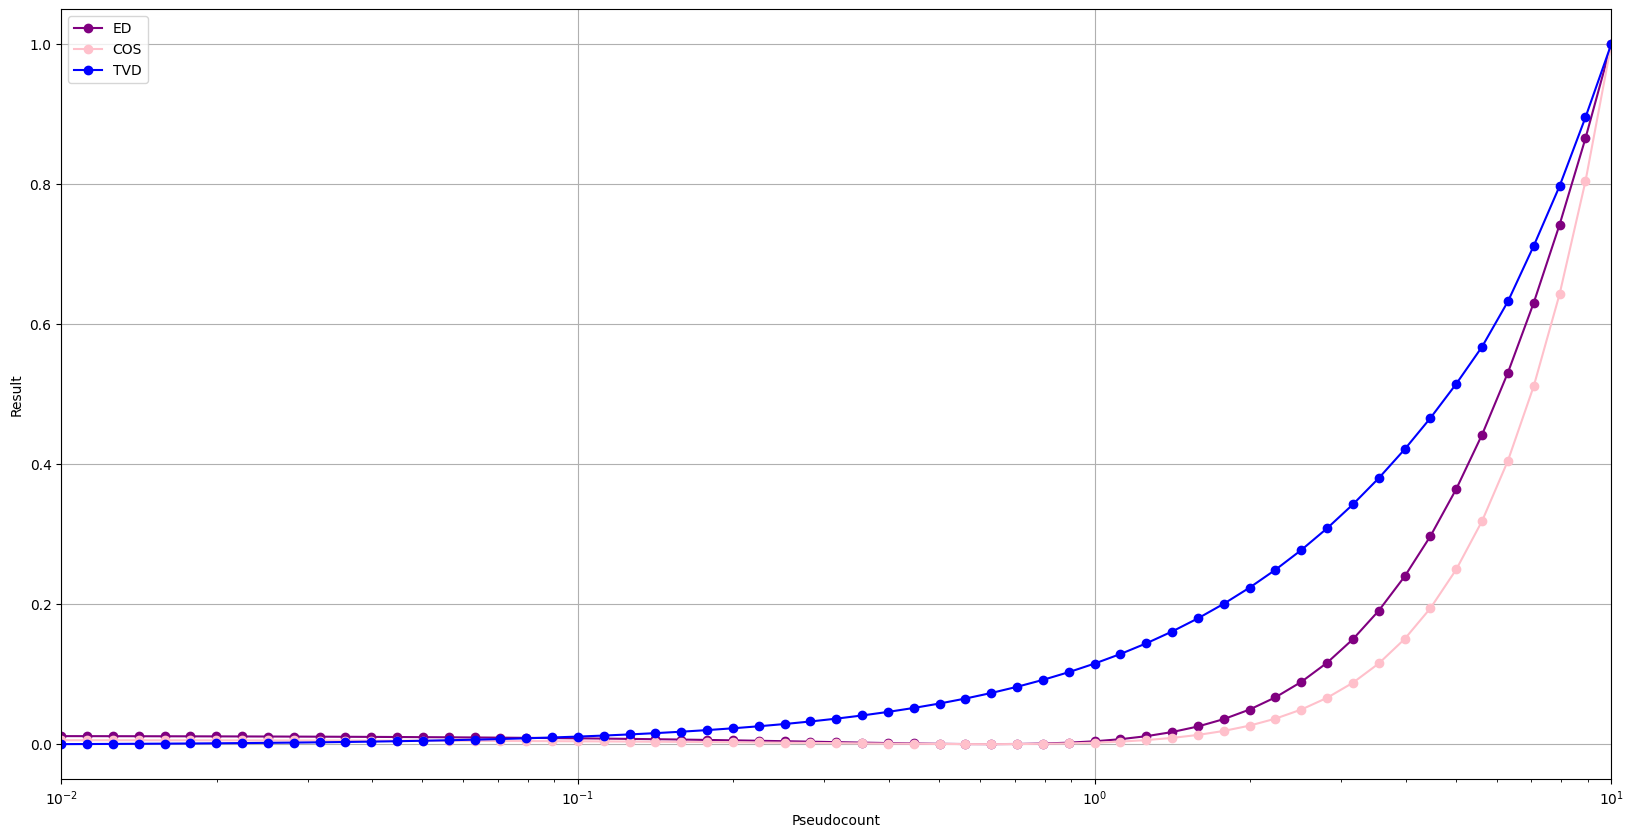

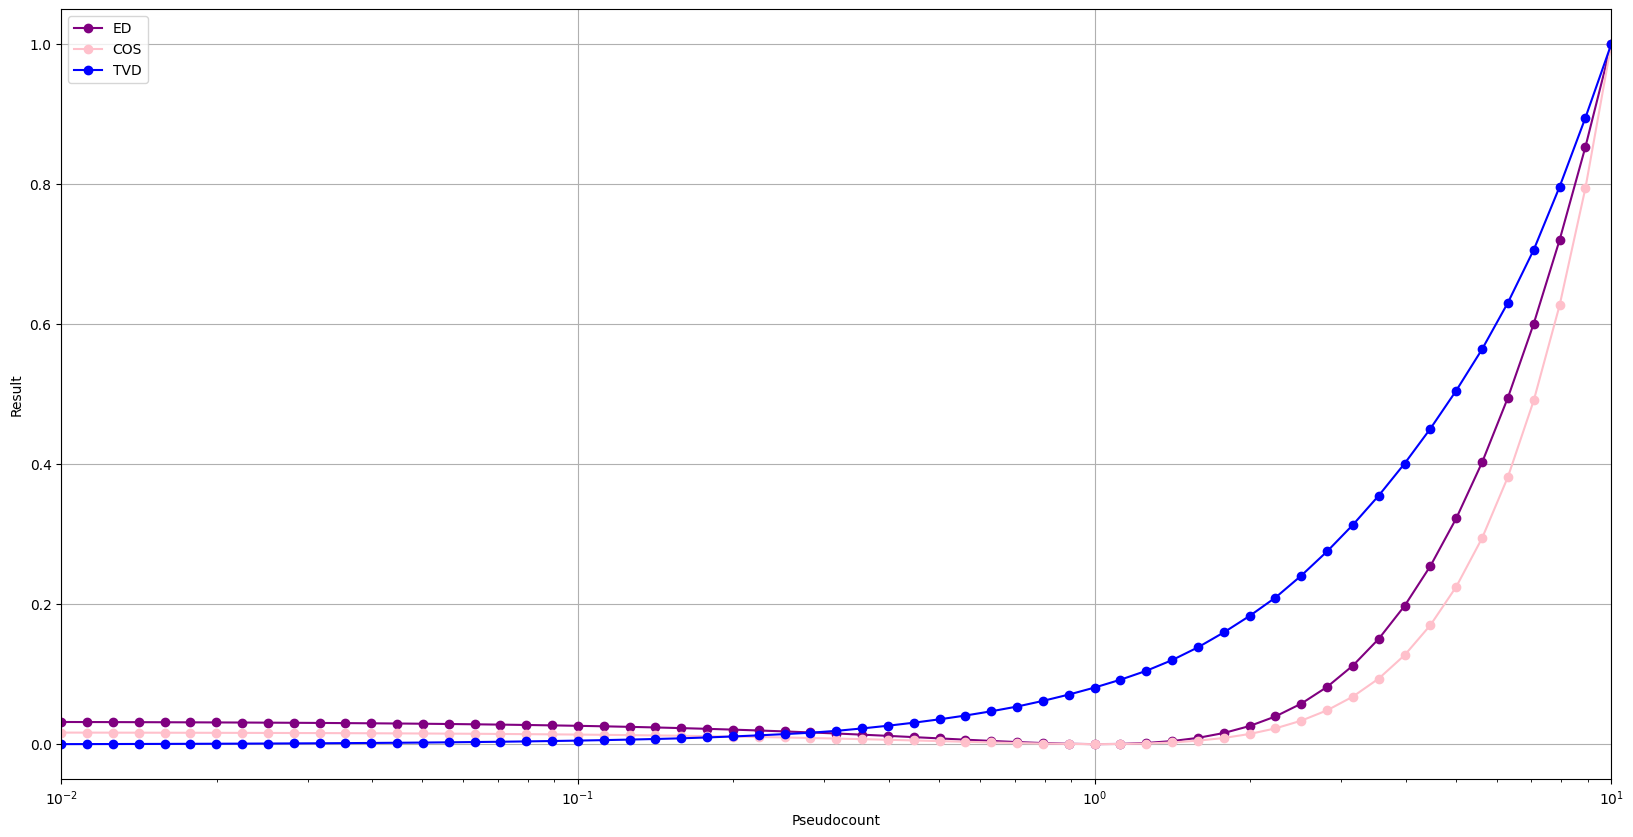

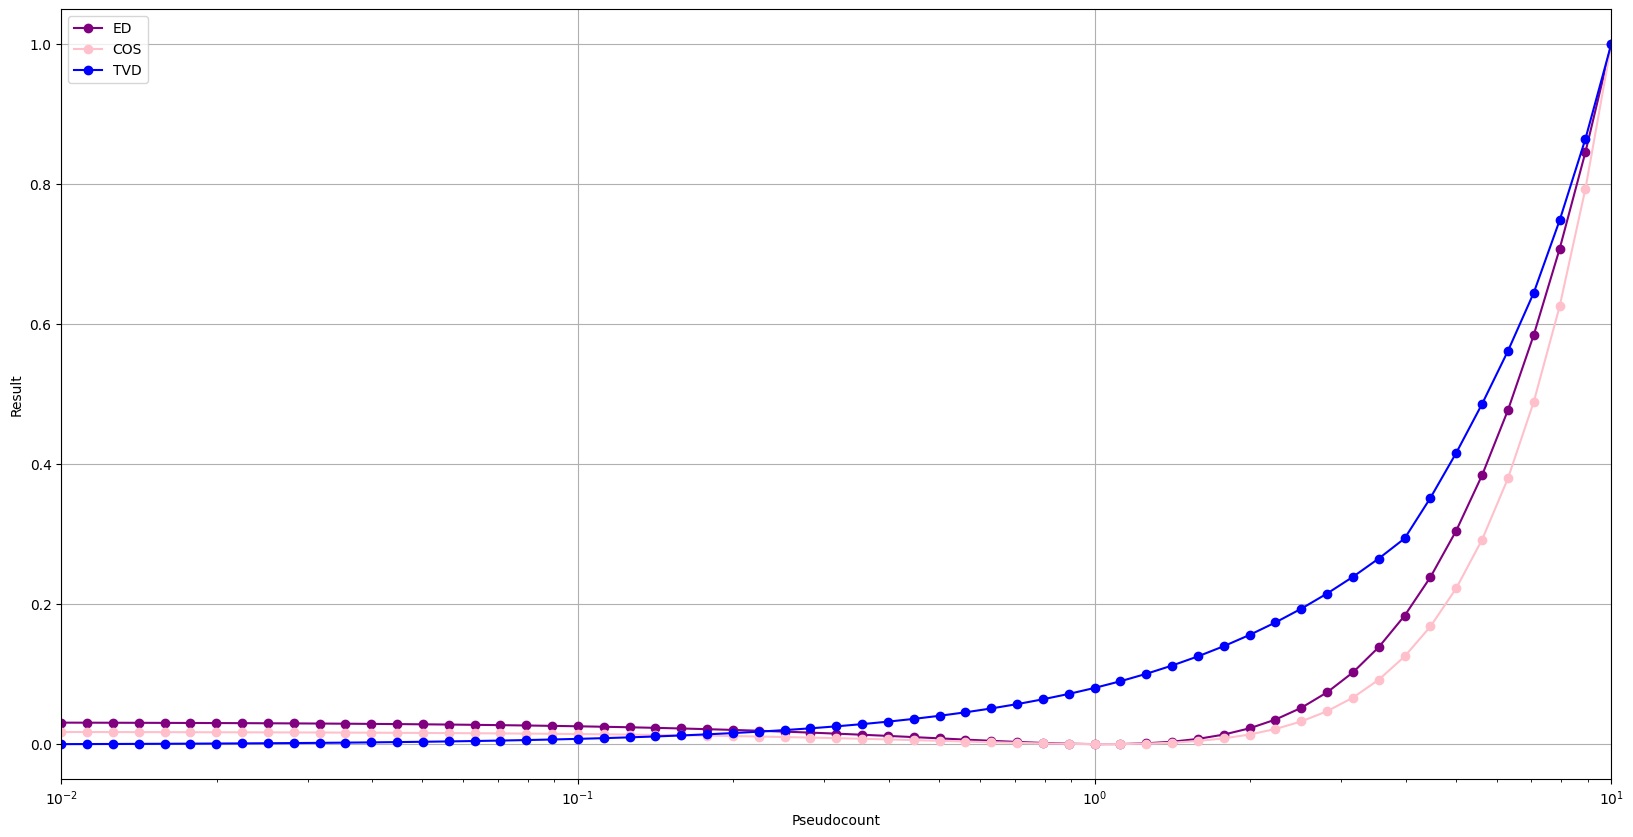

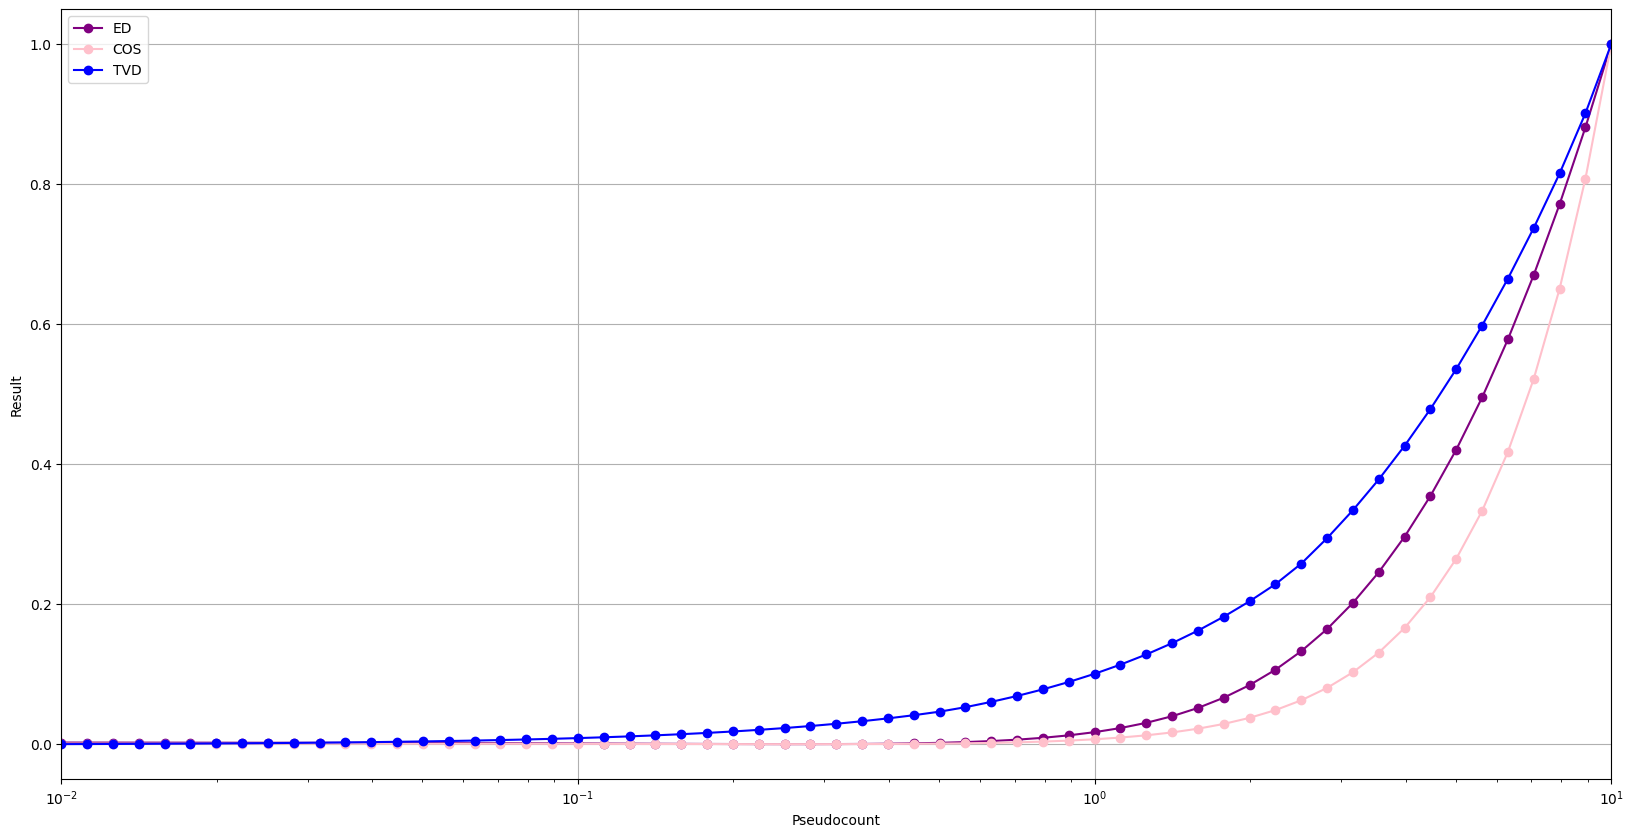

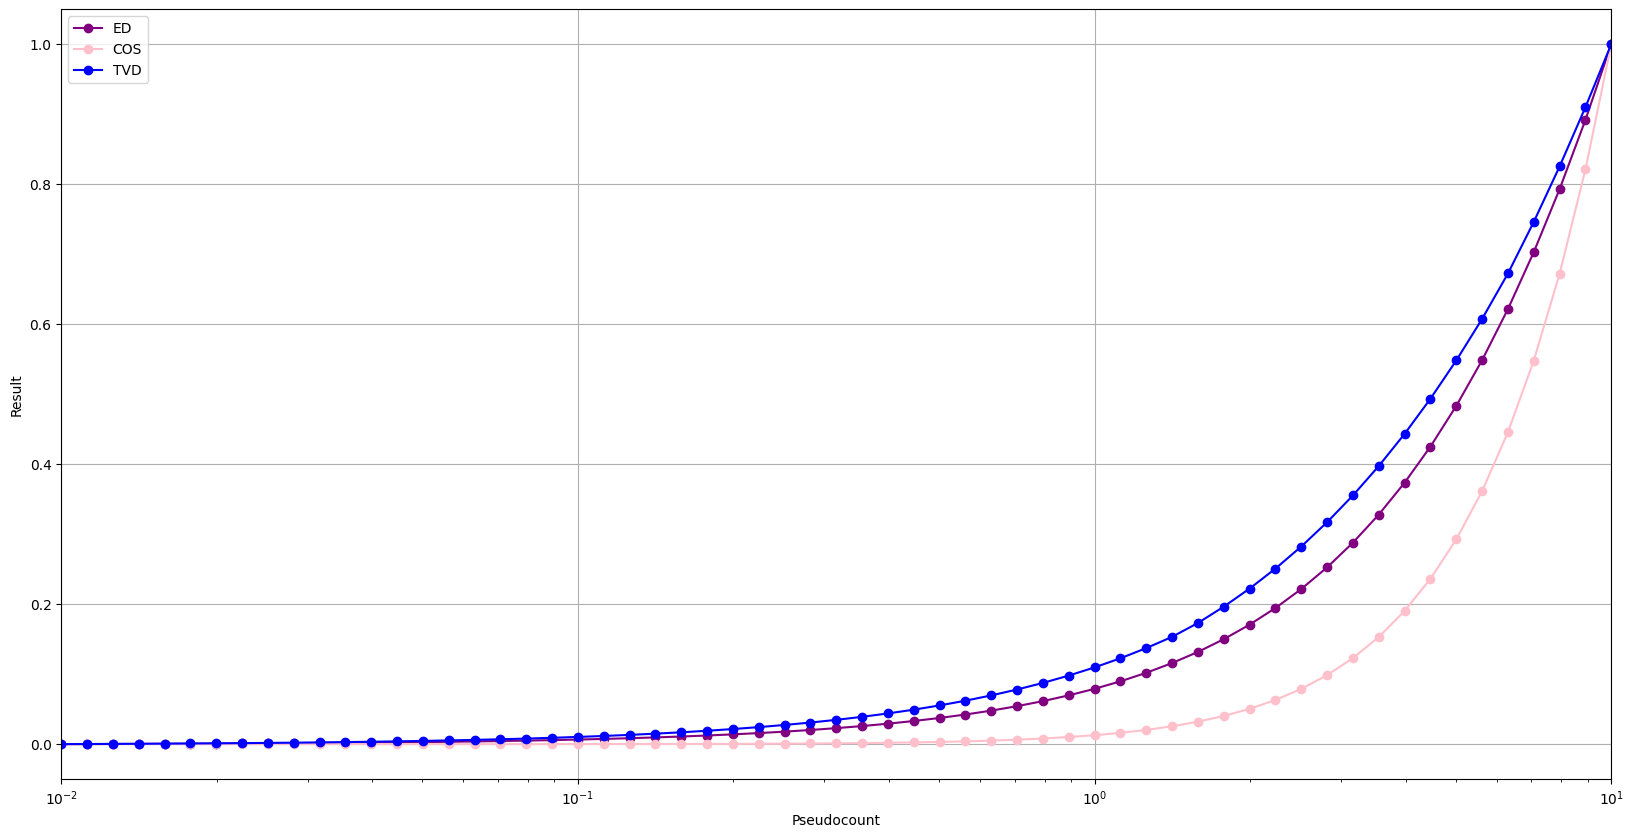

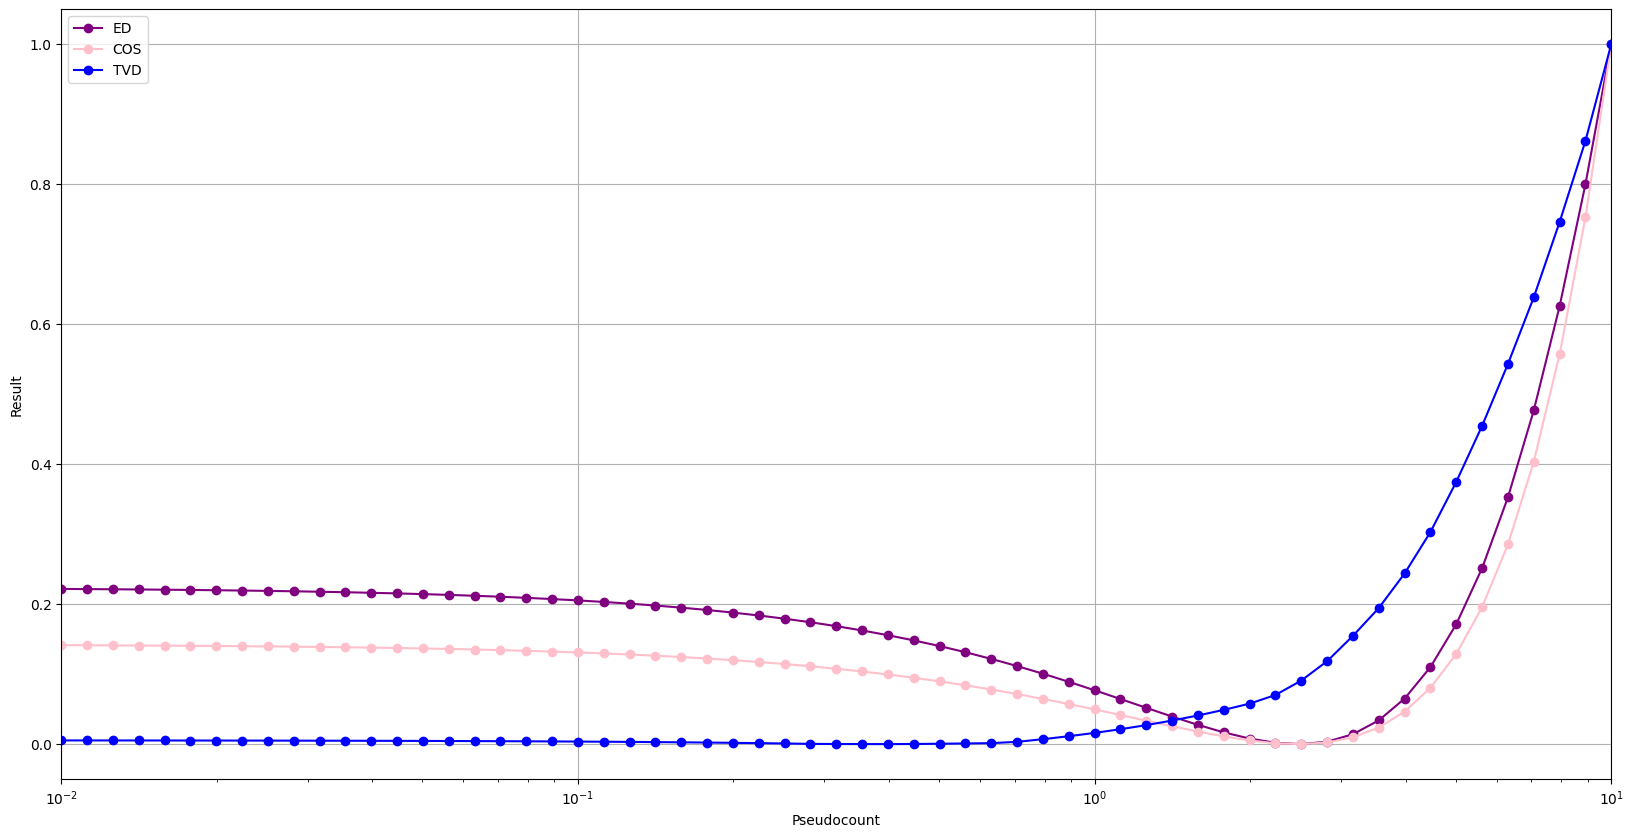

In [22]:
# adding different Pseudo counts and calculating distance using Euclidean distance

pseudocount = 0.01
w = 10
x = []
y = []
y2 = []
y3 = []
z = 0
counter = 1
i = 0

for sample_pfm in sample_PFMs:

  while z <= 60:

    pseudocount = np.power(10, ((z / 20) - 2))

    artificial_PPM = (sample_pfm + (pseudocount / 4)) / (30 + pseudocount)

    result = np.sum(np.power((PPMs[i] - artificial_PPM), 2))
    result = np.sqrt(result)

    multiply_matrix = np.multiply(PPMs[i], artificial_PPM)
    matrix_sum = np.sum(multiply_matrix)

    powered_PPM = np.power(PPMs[i], 2)
    result_PPM = np.sum(powered_PPM)
    result_PPM = np.sqrt(result_PPM)

    powered_artificial_PPM = np.power(artificial_PPM, 2)
    result_artificial = np.sum(powered_artificial_PPM)
    result_artificial = np.sqrt(result_artificial)

    COS = 1 - (matrix_sum/(result_PPM * result_artificial))

    tvd = np.sum(np.abs(PPMs[i] - artificial_PPM))

    x.append(pseudocount)
    y.append(result/w)
    y2.append(COS)
    y3.append(tvd/(2 * w))
    z += 1
    counter += 1

  normalized = np.interp(y, (np.min(y), np.max(y)), (0, 1))
  normalized2 = np.interp(y2, (np.min(y2), np.max(y2)), (0, 1))
  normalized3 = np.interp(y3, (np.min(y3), np.max(y3)), (0, 1))
  plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['purple', 'pink', 'blue', 'yellow'])
  plt.figure(figsize=(20, 10))
  plt.semilogx(x, normalized, label='ED',marker='o', linestyle='-')
  plt.semilogx(x, normalized2, label='COS',marker='o', linestyle='-')
  plt.semilogx(x, normalized3, label='TVD',marker='o', linestyle='-')
  plt.xlabel('Pseudocount')
  plt.ylabel('Result')
  plt.xlim(0.01, 10)
  plt.legend()
  plt.grid(True)
  plt.show()
  x = []
  y = []
  y2 = []
  y3 = []
  z = 0
  i += 1


In [24]:
PPM_entropies = []

for ppm in PPMs:

  entropies = entropy(ppm)
  sum = np.sum(entropies)
  PPM_entropies.append(sum)

In [25]:
for e in PPM_entropies:
  print(e)
  print("-----------------")

4.968654004116983
-----------------
6.254202428670327
-----------------
4.3030417017986355
-----------------
4.0735898731693485
-----------------
6.651840109059185
-----------------
6.831948112410339
-----------------
6.574644913438104
-----------------
3.634286031892097
-----------------
8.685643421311688
-----------------
7.111441008185007
-----------------
